In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
from datetime import datetime
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import copy

# Train user database : Data exploration
This file shows the most relevant plots computed from the train_user_2 database. The file will show : 
- Age distribution
- Date account created over the years & weekly
- Date first booking over the years & weekly
- first browser distribution

In [2]:
df = pd.read_csv("train_users_2.csv")
df_origin = copy.deepcopy(df)
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## 1. Age distribution
Ages are represented in two ways in the dataset, some data represent the age and some oters represent the date of birth. 

Also, many irrelevant ages are present or inexistant.

For the relevancy of the data we will only keep users between the age of 15 and 90 years old, and those who specified their age.

A first step is to include users having 2016-age belonging to [15,90] (users that mistook their age with date of birth)
Then the data will be cleaned to remove all users not in the span **[15,90]**, and those **who didn't specify their age**.

In [3]:
#Finding users who put their birthdate instead of age in original dataframe
df_birthyear = df[(df['age']>=1926) & (df['age']<=2001)]

#Converting to age
df_birthyear = copy.deepcopy(df_birthyear)
df_birthyear['age'] = 2016-df_birthyear['age']

#Replacing in original dataframe
df.loc[(df['age']>=1926) & (df['age']<=2001), 'age'] = df_birthyear


#Assigning a -1 value to invalid ages
df = copy.deepcopy(df)
df.loc[((df['age']<15) | (df['age']>90)), 'age'] = -1

#Counting invalid ages
OutOfBoundsAgePercentage = round(100*len(df.loc[(df['age'] == -1), 'age'])/len(df),2)
print('Percentage of users with irrelevant age',OutOfBoundsAgePercentage,'%')

Percentage of users with irrelevant age 1.21 %


We will store the *user_id* of the users who have an invalid age in a new csv file. These users will be deleted. Having the *user_id* in a separate file will allow us to delete the corresponding entries in the file *sessions.csv*

In [4]:
#invalid age
df_invalid_age = df.loc[(df['age']==-1), ['id']]
df = df[df['age'] != -1]

#not specified age
df_invalid_age= pd.concat([df_invalid_age, (df[df['age'].isnull()])])
df.dropna(subset=['age'],inplace = True)

#export
pd.DataFrame(df_invalid_age, columns=list(df_invalid_age.columns)).to_csv('invalid_age_user_id.csv', index=False, encoding="utf-8") 

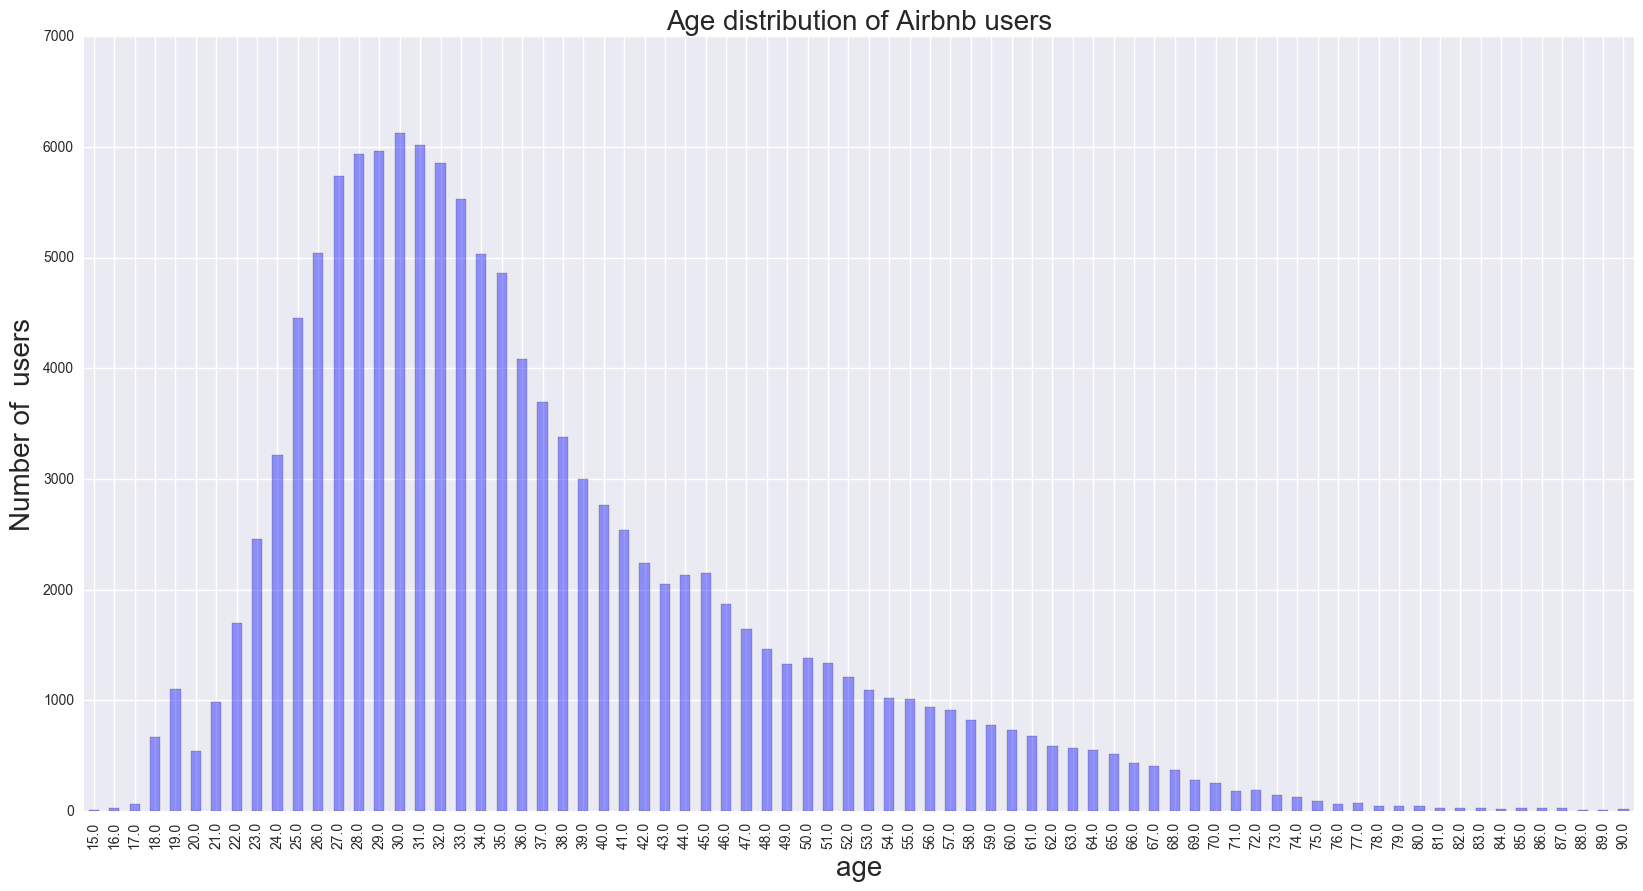

In [8]:
df.id.groupby(df.age).count().plot(kind='bar', alpha=0.4, color='b',figsize=(20,10))
plt.ylabel('Number of  users',fontsize='20')
plt.xlabel('age',fontsize='20')
plt.title(s='Age distribution of Airbnb users',fontsize='20')
plt.show()

In [9]:
removed = round(100-len(df)/len(df_origin)*100,2)
print('In total,',removed, '% have been removed from the original dataframe')

In total, 42.43 % have been removed from the original dataframe
